## Итоговая работа

In [2]:
import pandas as pnd
import scipy.stats as sts
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

### 1.Загрузить файл hr.csv.

In [3]:
data_hr=pnd.read_csv("HR.csv")
data_hr.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение).



In [3]:
data_hr.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
data_hr.mode()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.1,0.55,4.0,135,3.0,0.0,0.0,0.0,sales,low
1,NaN,NaN,NaN,156,NaN,NaN,NaN,NaN,NaN,NaN


### 3.Рассчитать и визуализировать корреляционную матрицу для переменных.



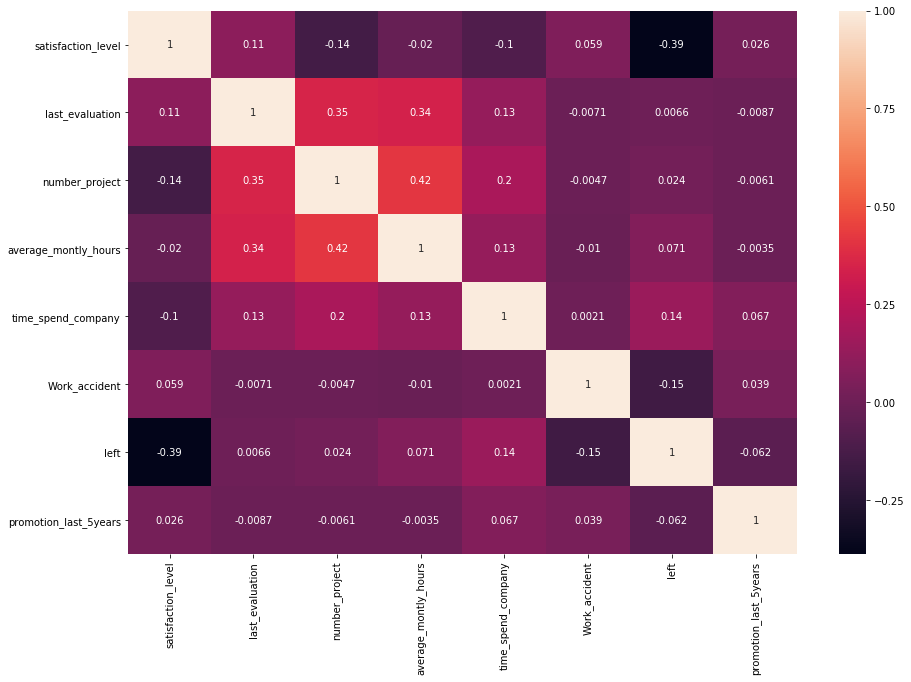

In [5]:
correlation=data_hr.corr()
fig, ax = plt.subplots(figsize=(15,10))  
sns.heatmap(correlation,annot=True,ax=ax)

### 4.Визуализировать несколько взаимосвязей между переменными.

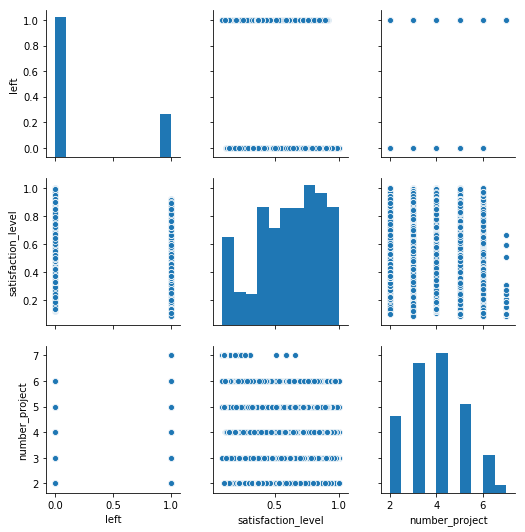

In [6]:
sns.pairplot(data_hr,vars=["left","satisfaction_level","number_project"])

### 5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными.

In [ ]:
Уровень среднйи удовлетворения у работающих и у уволенных

### 6.Рассчитать сколько работников работает в каждом департаменте.

In [7]:
data_hr.reset_index()
data_hr.head()
department_stat=data_hr[["salary","sales"]].groupby("sales").count().reset_index()
department_stat.columns=["Department","Number employees"]
department_stat

,Department,Number employees
0,IT,1227
1,RandD,787
2,accounting,767
3,hr,739
4,management,630
5,marketing,858
6,product_mng,902
7,sales,4140
8,support,2229
9,technical,2720


### 7.Показать распределение сотрудников по зарплатам.

Text(0,0.5,'Count employees')

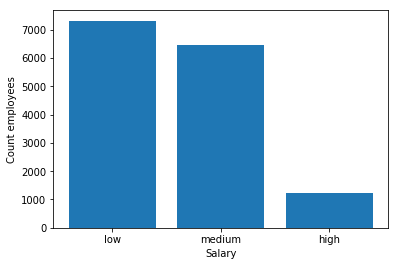

In [23]:
plt.bar(data_hr["salary"].value_counts().index,data_hr["salary"].value_counts())
plt.xlabel("Salary")
plt.ylabel("Count employees")

### 8.Показать распределение сотрудников по зарплатам совместно с департаментами.

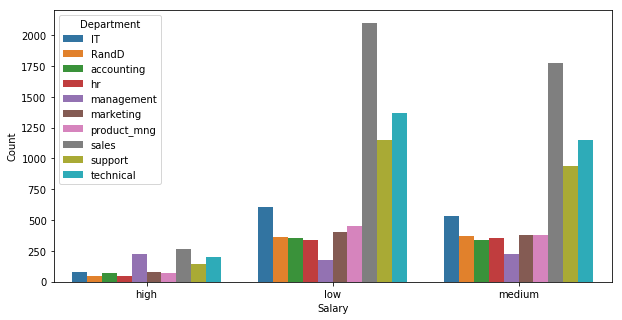

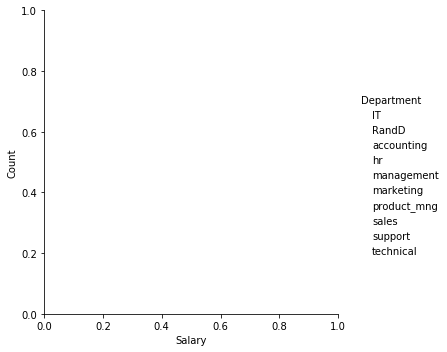

In [82]:



ff=data_hr.groupby(['sales', 'salary']).size().reset_index()
ff.columns=['Department','Salary','Count']
fig, ax = plt.subplots(1, 1, figsize=(10,5))
sns.catplot(x="Salary",y="Count",data=ff,kind="bar",hue="Department",ax=ax)
plt.show()
#plt.bar(data_hr["salary"].value_counts().index,data_hr["salary"].value_counts())
#data_hr["sales","salary","left"].groupby("sales","salary").size()
#plt.xlabel("Salary")
#plt.ylabel("Count employees")

### 9.Сколько сотрудников покинули компанию.

In [42]:
print("{} сотрудников покинуло компанию".format(data_hr["left"].sum()))

3571 сотрудников покинуло компанию


### 10.Проверить несколько гипотез для данных,чтобы понять почему сотрудники покидают компанию.

### 11.Загрузить результат (в формате .ipynbноутбука) в репозиторий. Разместить ссылку на репозиторий в окне сайте